In [1]:
# Problem Statement 

### Predicting Boston House Prices With Regression

### Introduction- 
Predicting the prices of houses can be a challenging and tiring task, especially for new customers who may not be sure of what constitutes a good deal. Fortunately, data science has made it possible to analyze housing data and make accurate predictions on what the house is worth. In this project, we will devlop a machine learning model for the prediction of houe prices. We will train and test our model on kaggle's dataset in which data is collected from houses in Boston’s suburbs. In this blog post, I will walk you through the steps involved in a data science project of Boston house price prediction.

In very first step we will be importing all the necessary libraries and modules 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#removing warnings
import warnings
warnings.filterwarnings('ignore')

The first step in any data science project is always to collect and analyze your data. In this project, we will use the **Boston Housing dataset** which is available for free through the UCI Machine Learning Repository. The dataset contains information about 506 houses in Boston along with various features that may influence their prices such as crime rate, average number of rooms per dwelling, and the age of the house. This data set also consists of the target column.
By using pandas' dataframe, we will import the train and test datasets. For the further process we will combine both dataset into one dataframe

In [4]:
test = pd.read_csv("Boston_Test.csv")
train = pd.read_csv("Boston_Train.csv")

In [5]:
df1 = pd.concat([test, train])

In [6]:
df1

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,351,0.07950,60.0,1.69,0,0.411,6.579,35.9,10.7103,4,411,18.3,370.78,5.49,24.1
1,352,0.07244,60.0,1.69,0,0.411,5.884,18.5,10.7103,4,411,18.3,392.33,7.79,18.6
2,353,0.01709,90.0,2.02,0,0.410,6.728,36.1,12.1265,5,187,17.0,384.46,4.50,30.1
3,354,0.04301,80.0,1.91,0,0.413,5.663,21.9,10.5857,4,334,22.0,382.80,8.05,18.2
4,355,0.10659,80.0,1.91,0,0.413,5.936,19.5,10.5857,4,334,22.0,376.04,5.57,20.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,346,0.06162,0.0,4.39,0,0.442,5.898,52.3,8.0136,3,352,18.8,364.61,12.67,17.2
347,347,0.01870,85.0,4.15,0,0.429,6.516,27.7,8.5353,4,351,17.9,392.43,6.36,23.1
348,348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
349,349,0.02899,40.0,1.25,0,0.429,6.939,34.5,8.7921,1,335,19.7,389.85,5.89,26.6


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 350
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 63.2 KB


### Description of the dataset:
**The features can be summarized as follows:**

- CRIM: This shows the per capita crime rate by town
- ZN: This shows the proportion of residential land zoned for lots larger than 25,000 sq.ft.
- INDUS: This shows the proportion of non-retail business acres per town.
- CHAS: This shows the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
- NOX: This shows the nitric oxides concentration (parts per 10 million)
- RM: This shows the average number of rooms per dwelling
- AGE: This shows the proportion of owner-occupied units built prior to 1940
- DIS: This shows the weighted distances to five Boston employment centers
- RAD: This shows the index of accessibility to radial highways
- TAX: This shows the full-value property-tax rate per \$10000
- PTRATIO: This shows the pupil-teacher ratio by town
- BLACK: This shows calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
- LSTAT: This shows the percentage lower status of the population
- MEDV: This shows the median value of owner-occupied homes in \$1000

### Data cleaning / Preprocessing

Next step is to clean and preprocess the data to make it suitable for predictive analysis. We will first look for any missing data and either fill in the gaps with an average or discard the data altogether. After that, we will normalize the data to make sure each feature in the dataset is on the same scale.

we will fetch first 5 and last 5 rows of the dataset for better understanding

In [8]:
df1.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,351,0.07950,60.0,1.69,0,0.411,6.579,35.9,10.7103,4,411,18.3,370.78,5.49,24.1
1,352,0.07244,60.0,1.69,0,0.411,5.884,18.5,10.7103,4,411,18.3,392.33,7.79,18.6
2,353,0.01709,90.0,2.02,0,0.410,6.728,36.1,12.1265,5,187,17.0,384.46,4.50,30.1
3,354,0.04301,80.0,1.91,0,0.413,5.663,21.9,10.5857,4,334,22.0,382.80,8.05,18.2
4,355,0.10659,80.0,1.91,0,0.413,5.936,19.5,10.5857,4,334,22.0,376.04,5.57,20.6


In [9]:
df1.tail()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
346,346,0.06162,0.0,4.39,0,0.442,5.898,52.3,8.0136,3,352,18.8,364.61,12.67,17.2
347,347,0.01870,85.0,4.15,0,0.429,6.516,27.7,8.5353,4,351,17.9,392.43,6.36,23.1
348,348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
349,349,0.02899,40.0,1.25,0,0.429,6.939,34.5,8.7921,1,335,19.7,389.85,5.89,26.6
350,350,0.06211,40.0,1.25,0,0.429,6.490,44.4,8.7921,1,335,19.7,396.90,5.98,22.9


### Checking for null values

In [10]:
df1.isna().sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

In [11]:
df1.isnull().sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

In [12]:
df1.duplicated().sum()

0

It shows that our dataset doesn't contain any null values or have any missing values 

Column named 'Unnamed: 0' is unnecessary for the prediction, will delete / drop it 

In [13]:
df1.drop("Unnamed: 0", axis = 1, inplace = True)
df1.reset_index(drop = True, inplace = True)

In [14]:
df1.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

Now we will look for null/ not available values

In [15]:
df1.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [16]:
#Shape of dataframe
df1.shape

(506, 14)

This shows that our dataframe have 14 features and 506 data entries

As we know target column is 'medv' , so for the ease we will be changing target column's name to 'Prices' 


In [17]:
df1.rename(columns={"medv":"Prices"}, inplace = True)

We will drop or remove the unnecessary features 

 ### Exploratory data analysis (EDA)

EDA  is the process of analyzing data in the form of graphs or maps, making it a lot easier to understand the trends or patterns in the data. There are various types of visualizations 
- Univariate analysis: This type of data consists of only one variable. It does not deal with causes or relationships and the main purpose of the analysis is to describe the data and find patterns that exist within it.
- Bi-Variate analysis: This type of data involves two different variables. The analysis of this type of data deals with causes and relationships and the analysis is done to find out the relationship among the two variables.
- Multi-Variate analysis: When the data involves three or more variables, it is categorized under multivariate.
> EDA helps in understanding dataset in better way. It makes the visualisation of dataset easy makes it easy for analysis. EDA techniques enables us to find the answers they need by discovering data patterns, spotting anomalies, checking assumptions, or testing a hypothesis.


In [18]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


This shows us some statistical data like percentile, mean and std of the numerical values of the DataFrame.
- count: gives us the frequency / not-empty values.
- mean: Gives average (mean) value.
- std : Shows standard deviation (measure of how dispersed the data is in relation to the mean).
- min: Returns the minimum value
- max: Returns the maximum value

__Features 'crim' and 'rm' have a large difference between their median and mean which indicates lot of outliers in respective variables.__

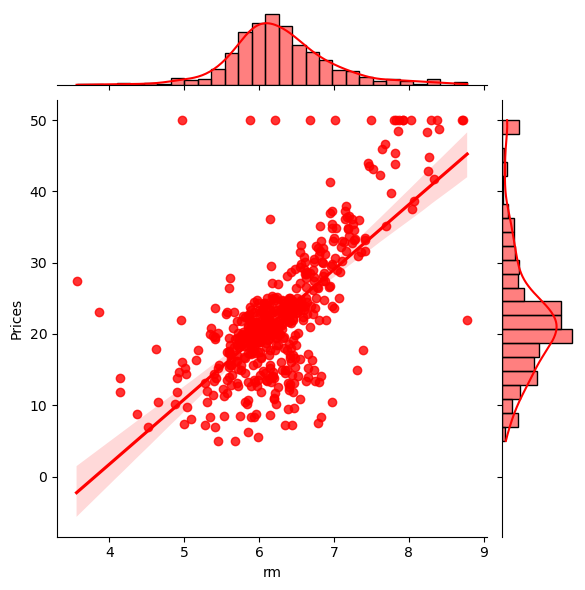

In [19]:
 sns.jointplot(x = "rm", y = "Prices", data = df1, kind = "reg", color= "red")
 plt.show()

We can conclude form above graphs that, there is linear relationship between ‘RM’ and House prices ‘Prices’.  A linear relationship is one where increasing or decreasing one variable n times will cause a corresponding increase or decrease of n times in the other variable too. That means increase and decrease in the 'rm' values results corresponding increse amd decrease in the 'prices' values. In addition, we can infer from the histogram that the ‘Prices’ variable seems to be normally distributed but contain several outliers.<br>
<br>
**Reason** to choose this plot :-<br>
It is ideal plot to visualize linear relationship between features.

**Correlation**<br> 
The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

In [20]:
cor = df1.corr()

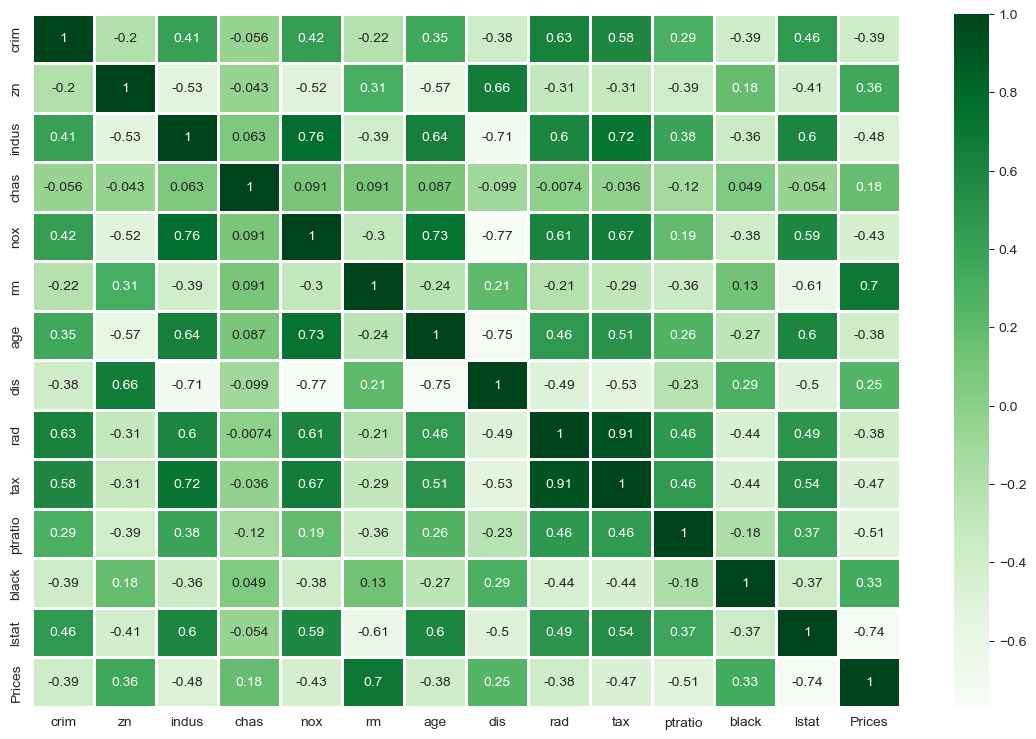

In [21]:
plt.figure(figsize=(14,9))
sns.set_style('darkgrid')
sns.heatmap(cor , annot = True, linewidths=.9, linecolor="White", cmap="Greens")
plt.show()

In case of linear regression model, we need to select those features which have a high correlation with our target variable 'Prices'. Higher the correlation between feature variable and target variable means the higher the dependencies.From above heatmap of correlation matrix we can conclude that RM has a strong positive correlation with target variable 'Prices' which is 0.7 whereas LSTAT has a high negative correlation with target variable 'Prices' which is -0.74. The features 'rm', 'ptratio' and 'lstat' can be considered to be important features for prediction.<br>
<br>
**Reason** to choose this plot :-<br>
It's one of the best tools for identifying trends and patterns in data because it's so versatile. Heatmap helps with more generalized view of numeric values. Warm-to-cool color schemes are most commonly used in heatmap visualization, where warm colors represent high-value data points, and cool colors represent low-value data points.

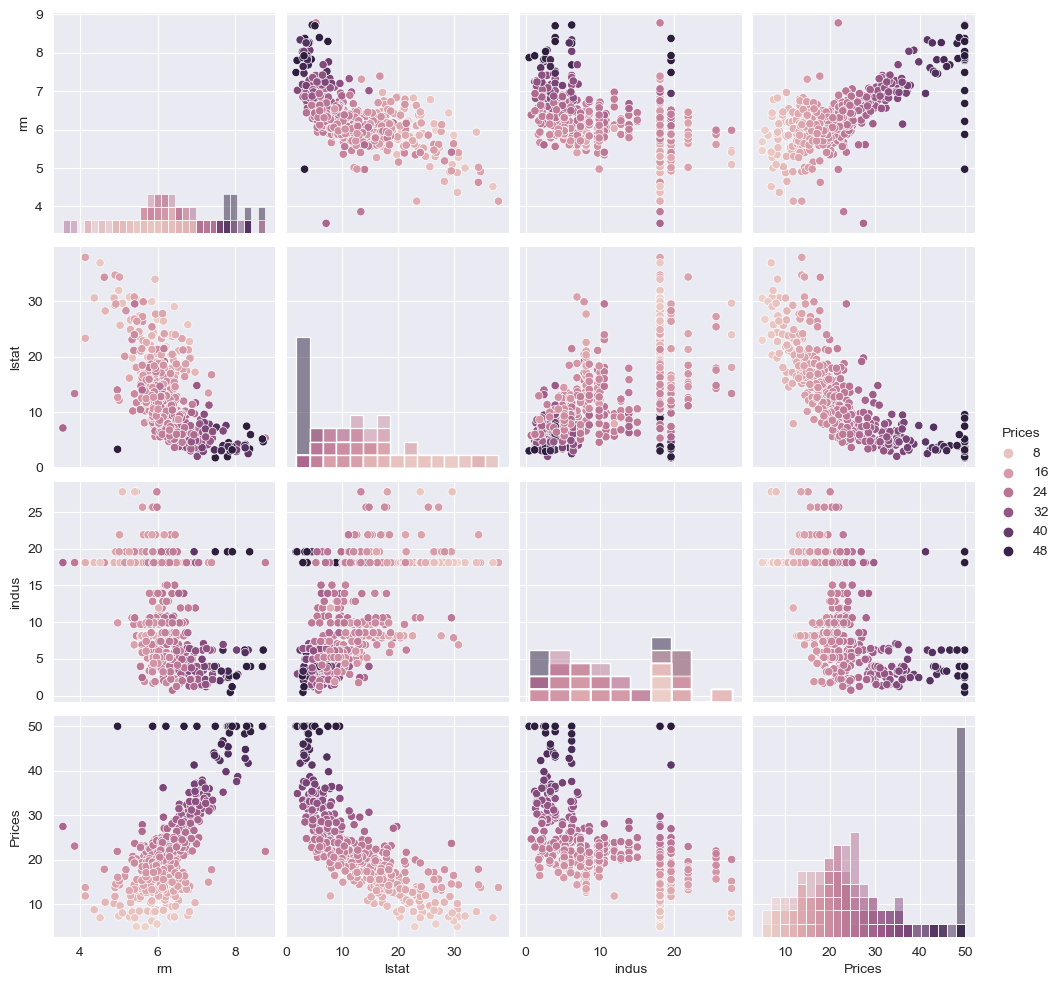

In [22]:
sns.pairplot(df1,hue="Prices", vars= ["rm", "lstat","indus","Prices"], kind = 'scatter', diag_kind='hist')
plt.show()

Above graph shows that, in 'rm' vs 'Prices' scatter plot we can form the cluster which means it have strong (Positive) linear relationship between them. While 'lstat' vs 'Prices' scatter plot shows strong negative linear relationship between two features. In 'indus' vs 'Prices' scatter plot, it is hard to form a cluster from plotted points which means features have really weak or no relationship.<br>
**Reason** to choose this plot :-<br>
The pairs plot visualises both the distribution of one variable and the relationships between two variables.

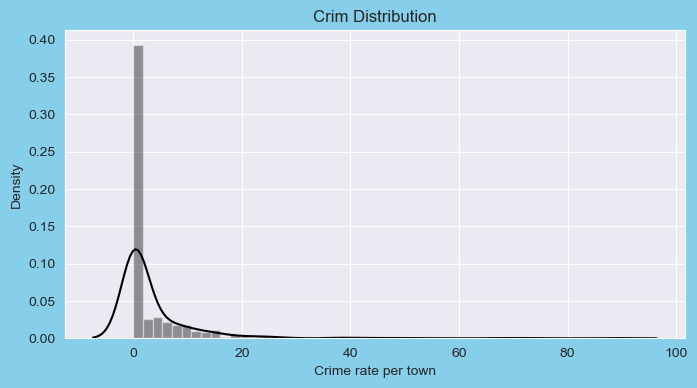

In [23]:
plt.figure(figsize=(8,4),facecolor="skyblue")
sns.distplot(df1["crim"],hist=True, color="black").set_title("Crim Distribution")
plt.xlabel("Crime rate per town")
plt.show()

This plot shows that more than 380 entries have really low crime rate while rest of the entries have crime rate slightly high ranging upto 17-18%.<br> 
<br>
**Reason** to choose this plot :-<br>
The distplot helps to visualise a distribution of a single feature against the density distribution.

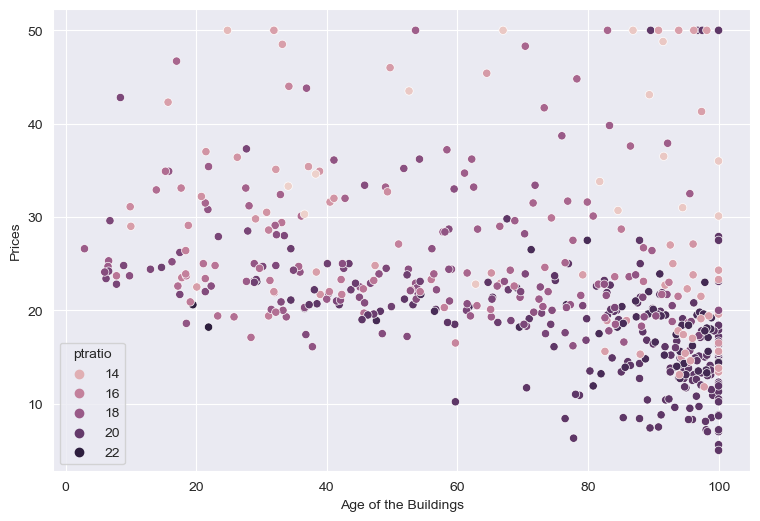

In [24]:
plt.figure(figsize=(9,6))
sns.scatterplot(data=df1, y="Prices", x="age", hue="ptratio" )
plt.xlabel("Age of the Buildings")
plt.ylabel("Prices")
plt.show()

<Figure size 800x400 with 0 Axes>

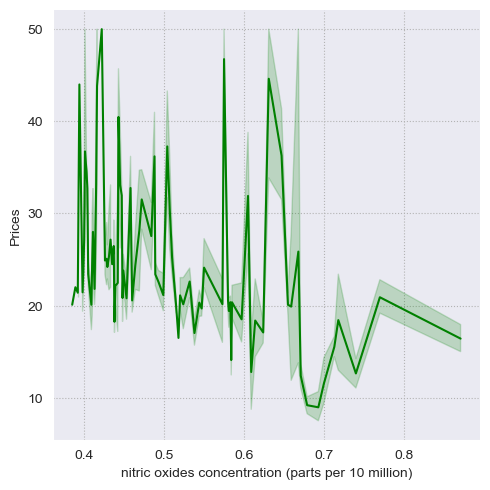

In [25]:
sns.set_style("darkgrid", {"grid.color": ".7", "grid.linestyle": ":"})
plt.figure(figsize=(8,4))
sns.relplot(x="nox",y="Prices",data=df1 ,color="Green", kind="line")
plt.xlabel("nitric oxides concentration (parts per 10 million)")
plt.show()

We can observe form above graph that line plot is overlapping which makes it hard to identify the patterns.<br>
**Reason** to choose this plot :-<br>
It is easy to visualize how variables in a dataset relate to each other with a Relational Plot (relplot).

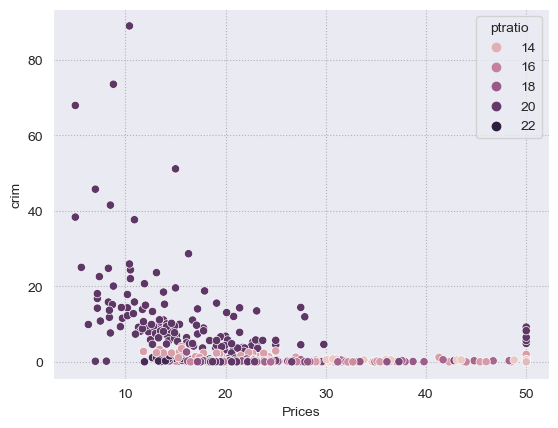

In [26]:
sns.scatterplot(data=df1, x="Prices", y="crim", hue="ptratio" )
plt.show()

It shows the overlapping of the data points which results in hard to identify the patterns. we can conclude that there is no relationship between the features <br>
<br>
**Reason** to choose this plot :-<br>
Scatter plots can effectively shows the relationship between variables and uses coordinate to show their relationship.

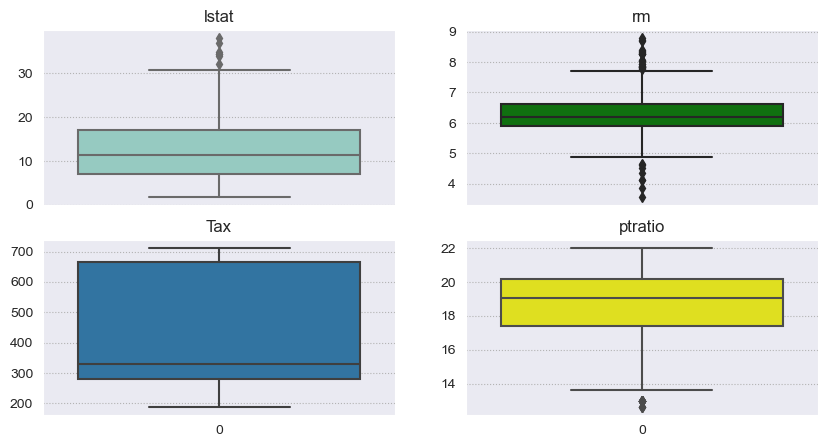

In [27]:
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(10,5))
sns.set_style("darkgrid")
sns.boxplot(ax=axes[0, 0], data=df1["lstat"],  palette="Set3").set_title("lstat")
sns.boxplot(ax=axes[0, 1], data=df1["rm"], color="Green").set_title("rm")
sns.boxplot(ax=axes[1, 0], data=df1["tax"]).set_title("Tax")
sns.boxplot(ax=axes[1, 1], data=df1["ptratio"], color="Yellow").set_title("ptratio")

plt.show()

As suggested earlier variables 'lstat' and 'rm' do have a lot of outliers.So these columns lstat and rm are heavily skewed. This is due to the presence of the Outliers present in our dataset.<br>
75% owmer have tax rate upto 660-680 per $10000.<br>
<br>
**Reason** to choose this plot :-<br>
With the boxplot,easy to see what the minimum, maximum, median, first quartile, and third quartile are in the data set.

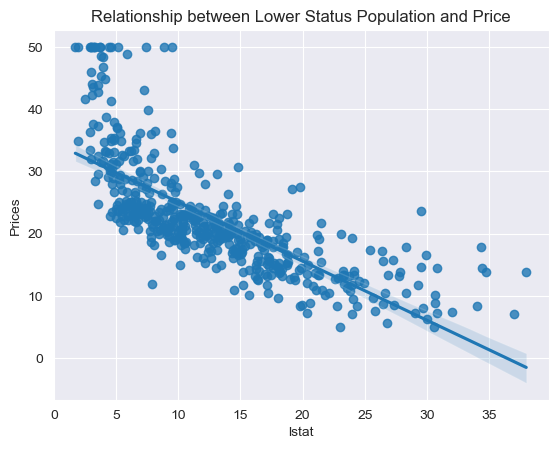

In [28]:
sns.regplot(y="Prices",x="lstat", data=df1, fit_reg= True)
plt.title("Relationship between Lower Status Population and Price")
plt.show()

This shows the negative correlation between feature 'lstat' and 'Prices' that is Price of houses is inversely propotional to the lower status population. We can conclude that as the value of low status population increases there is decrease in house prices.<br>
<br>
**Reason** to choose this plot :-<br>
This graph is used to plot data and check a linear relationship between features. This plot is consists of a regression line which is expected to coincide the scatter points.

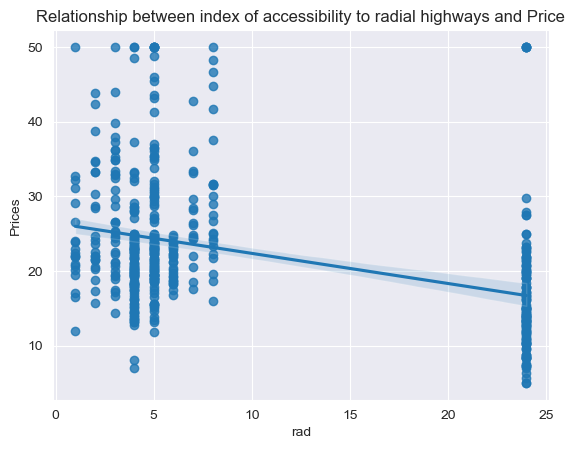

In [29]:
sns.regplot(y="Prices",x="rad", data=df1, fit_reg= True)
plt.title("Relationship between index of accessibility to radial highways and Price")
plt.show()

Above plot indicates that prices feature have high value for top index of accessibility to radial highways that means houses with higher accessibility to highways. It is difficult to conclude whether 'rad' variable affecting the house prices since it doesn't show any strong linear relationship. Therefore we won't be using it for model training.<br>
<br>
**Reason** to choose this plot :-<br>
This graph is used to plot data and check a linear relationship between features. This plot is consists of a regression line which is expected to coincide the scatter points.

We can drop the features which show really weak relationship or shows no relationship at all.

In [30]:
df1.drop("zn", axis=1, inplace = True)
df1.reset_index(drop = True, inplace = True)

In [31]:
df1.drop("age", axis=1, inplace = True)
df1.reset_index(drop = True, inplace = True)

In [32]:
df1.drop("crim", axis=1, inplace = True)
df1.reset_index(drop = True, inplace = True)

In [33]:
df1.drop("black", axis=1, inplace = True)
df1.reset_index(drop = True, inplace = True)

In [34]:
df1.drop("chas", axis=1, inplace = True)
df1.reset_index(drop = True, inplace = True)

In [35]:
df1.drop("dis", axis=1, inplace = True)
df1.reset_index(drop = True, inplace = True)

In [36]:
df1

,indus,nox,rm,rad,tax,ptratio,lstat,Prices
0,1.69,0.411,6.579,4,411,18.3,5.49,24.1
1,1.69,0.411,5.884,4,411,18.3,7.79,18.6
2,2.02,0.410,6.728,5,187,17.0,4.50,30.1
3,1.91,0.413,5.663,4,334,22.0,8.05,18.2
4,1.91,0.413,5.936,4,334,22.0,5.57,20.6
...,...,...,...,...,...,...,...,...
501,4.39,0.442,5.898,3,352,18.8,12.67,17.2
502,4.15,0.429,6.516,4,351,17.9,6.36,23.1
503,2.01,0.435,6.635,4,280,17.0,5.99,24.5
504,1.25,0.429,6.939,1,335,19.7,5.89,26.6


In [37]:
# Preparing the dataset
X = df1.drop(["Prices"], axis = 1)
Y = df1["Prices"]

#minmax normalization

cols = ["rm", "nox", "lstat", 'rad','indus']
for col in cols:
    #find minimum and maximum of that column
    minimum = min(df1[col])
    maximum = max(df1[col])
    df1[col] =(df1[col] - minimum) / (maximum - minimum)

In [38]:
from sklearn import preprocessing 
scalar = preprocessing.StandardScaler()
scaled_cols = scalar.fit_transform(df1[cols])
scaled_cols = pd.DataFrame(scaled_cols, columns=cols)
scaled_cols.head()

,rm,nox,lstat,rad,indus
0,0.419371,-1.241285,-1.004074,-0.637962,-1.378373
1,-0.570767,-1.241285,-0.681674,-0.637962,-1.378373
2,0.631645,-1.249924,-1.142846,-0.523001,-1.330223
3,-0.885617,-1.224009,-0.645229,-0.637962,-1.346273
4,-0.496685,-1.224009,-0.992860,-0.637962,-1.346273


In [39]:
for col in cols:
    df1[col] = scaled_cols[col]

In [40]:
df1

,indus,nox,rm,rad,tax,ptratio,lstat,Prices
0,-1.378373,-1.241285,0.419371,-0.637962,411,18.3,-1.004074,24.1
1,-1.378373,-1.241285,-0.570767,-0.637962,411,18.3,-0.681674,18.6
2,-1.330223,-1.249924,0.631645,-0.523001,187,17.0,-1.142846,30.1
3,-1.346273,-1.224009,-0.885617,-0.637962,334,22.0,-0.645229,18.2
4,-1.346273,-1.224009,-0.496685,-0.637962,334,22.0,-0.992860,20.6
...,...,...,...,...,...,...,...,...
501,-0.984418,-0.973497,-0.550822,-0.752922,352,18.8,0.002374,17.2
502,-1.019436,-1.085795,0.329617,-0.637962,351,17.9,-0.882122,23.1
503,-1.331682,-1.033965,0.499151,-0.637962,280,17.0,-0.933987,24.5
504,-1.442573,-1.085795,0.932248,-0.982843,335,19.7,-0.948004,26.6


Once we have clean data, next step is to build our machine learning model for price prediction. In this project, we will use a linear regression model to predict the prices of houses based on various features such as crime rate, number of rooms per dwelling, and the age of the house. Building a linear regression model will allow us to use these features to make a prediction on the price of a house in advance.

In [41]:
# Splitting into training and test 
X = df1.drop(columns=["Prices"], axis=1)
y = df1["Prices"]

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)


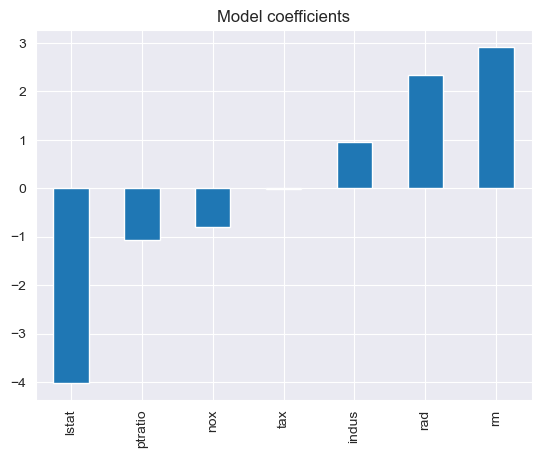

In [42]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize= True)
model.fit(X_train, y_train)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model coefficients")
plt.show()

In [43]:
y_pred = model.predict(X_train)

In [44]:
model.score(X_test,y_test)

0.7393402339517359

In conclusion, this data science project of Boston house price prediction have collecting, analyzing, preprocessing, and building a machine learning model on our data. The process allowed us to make reasonable predictions about the housing prices in the area and helped us to understand the different features that effects the value of a home. When it comes to real-world applications, these data science techniques can be used to provide accurate pricing to customers so they can make informed choices.